<a href="https://colab.research.google.com/github/MrAgabaidu/Data-Sciences/blob/main/Neural_net_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from ast import increment_lineno
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 38s 86ms/step - loss: 0.3568 - accuracy: 0.8912 - val_loss: 0.0818 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 35s 84ms/step - loss: 0.1126 - accuracy: 0.9649 - val_loss: 0.0565 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 37s 87ms/step - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.0457 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 34s 81ms/step - loss: 0.0718 - accuracy: 0.9775 - val_loss: 0.0391 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0629 - accuracy: 0.9804 - val_loss: 0.0401 - val_accuracy: 0.9873
Epoch 6/15
422/422 [==============================] - 34s 80ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.0354 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 35s 82ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0320 - val_accuracy:

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02389710582792759
Test accuracy: 0.9916999936103821


In [7]:
predictions=model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [10]:
pred=[np.argmax(x) for x in predictions]

In [21]:
y_test=[np.argmax(x) for x in y_test]

In [22]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=pred)

Text(95.72222222222221, 0.5, 'Truth')

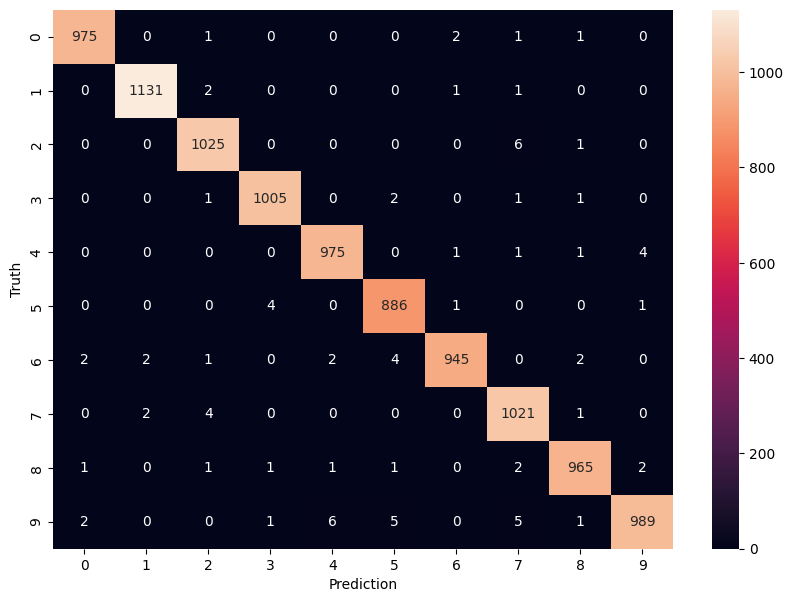

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')